<a href="https://colab.research.google.com/github/dvarelaj/nlp-miniproyecto-icesi/blob/main/procesamiento_texto_nlp_clasico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
from spacy.matcher import Matcher
from collections import Counter
import spacy.cli

In [6]:
!git clone https://github.com/Ohtar10/icesi-nlp.git

Cloning into 'icesi-nlp'...
remote: Enumerating objects: 196, done.
remote: Counting objects: 100% (92/92), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 196 (delta 78), reused 72 (delta 72), pack-reused 104 (from 2)
Receiving objects: 100% (196/196), 4.32 MiB | 18.66 MiB/s, done.
Resolving deltas: 100% (100/100), done.


In [2]:
spacy.cli.download("es_core_news_sm")
nlp = spacy.load('es_core_news_sm')

✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [4]:
url_datos = 'https://raw.githubusercontent.com/dvarelaj/nlp-miniproyecto-icesi/main/quejas_anonimizadas_muestra_etiqueta.csv'

df = pd.read_csv(url_datos, sep=';')
df.head()

,compania,regional,fecha de apertura,fecha de cierre,numero del caso,tipo,estado,medio de recepcion,proceso,causa,causa raiz,lugar ocurrencia,tipificacion interna,descripcion_anonimizada,y_true,justificacion_tecnica
0,ARL,REGIONAL NORTE,19/01/26,19/01/26,"2,60119E+13",QUEJA,Cierre a favor del cliente,LLAMADA DE ENTRADA,TRANSFORMACION DIGITAL,INCONVENIENTES TECNICOS SITIOS WEB,FALLA INTERACCION CON SISTEMA INTERNOS,SANTA ROSA,Problema de perfil,usuaria se comunica porque requiere ingresar a...,neg,Falla tŽcnica que impide la operaci—n.
1,ARL,REGIONAL NORTE,28/01/26,NaN,"2,60128E+13",QUEJA,Abierto,LLAMADA DE ENTRADA,TRANSFORMACION DIGITAL,INCONVENIENTES GENERALES - SUCURSAL VIRTUAL,NaN,MONTERIA,Error novedad ingreso trabajadores,empresa cc : [ID_ANONIMIZADO] ingresa con usua...,neg,Bloqueo de proceso core de la empresa.
2,ARL,REGIONAL OCCIDENTE,29/01/26,29/01/26,"2,60129E+13",PETICION,Cierre aclarando al cliente,LLAMADA DE ENTRADA,TRANSFORMACION DIGITAL,ASESORIA USO DE SITIO TRANSACCIONAL Y SERVICIO...,NaN,PASTO,NaN,se comunica porque esta ingresando al portal p...,neg,Incidente de integridad de datos/privacidad.
3,ARL,REGIONAL CENTRO,19/01/26,19/01/26,"2,60119E+13",QUEJA,Cierre aclarando al cliente,LLAMADA DE ENTRADA,TRANSFORMACION DIGITAL,INCONVENIENTES TECNICOS SITIOS WEB,FALLA INTERACCION CON SISTEMA INTERNOS,BOGOTA D.C.,No permite ingresar,nehcesito afiliar a unas personas pero me sale...,neu,"Reporte de estado de sistema, tono informativo."
4,ARL,REGIONAL CENTRO,27/01/26,NaN,"2,60127E+13",QUEJA,Abierto,WHATSAPP,TRANSFORMACION DIGITAL,INCONVENIENTES GENERALES - SUCURSAL VIRTUAL,NaN,BOGOTA D.C.,Certificado afiliaciÃ³n,id chat : [ID_ANONIMIZADO] canal de atencion w...,neg,Frustraci—n por reincidencia del error.


In [7]:
# Creamos una columna con la longitud de cada queja (en número de palabras)
df['longitud'] = df['descripcion_anonimizada'].apply(lambda x: len(str(x).split()))

# Buscamos la fila con el máximo de palabras
indice_max = df['longitud'].idxmax()
queja_mas_larga = df['descripcion_anonimizada'].iloc[indice_max]

print(f"La queja más larga es la número {indice_max} con {df['longitud'].max()} palabras.")
print("-" * 50)
print(queja_mas_larga[:500] + "...")

La queja más larga es la número 100 con 337 palabras.
--------------------------------------------------
asunto reclamo por falla tecnica recurrente en generacion de certificados con nivel de riesgo plataforma web seÃ±ores arl Anonimo corp area de servicio al cliente soporte tecnico cordial saludo por medio de la presente yo bernabe garcia carvajal identificado con la cedula de ciudadania numero : [ID_ANONIMIZADO] actuando en calidad de empleador interpongo un reclamo formal debido a fallas tecnicas persistentes en su plataforma web gestion administrativa gestion de riesgos laborales hechos tengo a...


In [8]:
doc_largo = nlp(queja_mas_larga.lower())

# Ejemplo: Ver cuántas oraciones tiene esta queja específica
oraciones_largo = list(doc_largo.sents)
print(f"Esta queja tiene {len(oraciones_largo)} oraciones.")

# Ver las entidades (Empresas, Lugares, Fechas) que SpaCy detecta
print("\nEntidades encontradas en la queja larga:")
for ent in doc_largo.ents:
    print(f"{ent.text:{30}} {ent.label_}")

Esta queja tiene 1 oraciones.

Entidades encontradas en la queja larga:
seã±ores                       MISC
seã±or wilson                  MISC
javier garzon                  PER
contratacion                   PER


El modelo preentrenado es_core_news_sm presenta dificultades con el Reconocimiento de Entidades Nombradas (NER) en textos técnicos. Por ejemplo, clasificó 'sistema falle' como una localización (LOC). Esto demuestra que para temas tecnologícos, sería ideal un reentrenamiento del modelo con datos específicos del dominio.

In [9]:
print(f"Tokens en la queja: {len(doc_largo)}")
sentences = list(doc_largo.sents)
print(f"Oraciones encontradas: {len(sentences)}")

Tokens en la queja: 347
Oraciones encontradas: 1


A diferencia del texto literario de Owl Creek, las quejas suelen tener oraciones más cortas y una puntuación menos formal, lo que puede dificultar la segmentación de oraciones en algunos casos.

In [10]:
print("{:20}{:20}{:20}{:20}".format("Token", "POS", "Dep", "Lemma"))
for token in sentences[0]: # Analizamos la primera oración de la queja
    print(f"{token.text:{20}}{token.pos_:{20}}{token.dep_:{20}}{token.lemma_:{20}}")

Token               POS                 Dep                 Lemma               
asunto              NOUN                nsubj               asunto              
reclamo             ADJ                 amod                reclamo             
por                 ADP                 case                por                 
falla               NOUN                obj                 falla               
tecnica             ADJ                 amod                tecnico             
recurrente          ADJ                 amod                recurrente          
en                  ADP                 case                en                  
generacion          PROPN               obl                 generacion          
de                  ADP                 case                de                  
certificados        NOUN                nmod                certificado         
con                 ADP                 case                con                 
nivel               NOUN    

In [11]:
# Patrón para detectar cuando mencionan errores o fallas
pattern_error = [
    {'LEMMA': {'IN': ['error', 'falla', 'fallar', 'problema']}},
    {'POS': 'ADJ', 'OP': '*'}, # Adjetivos opcionales como "técnica" o "recurrente"
]

# Initialize the matcher with the nlp object's vocabulary (if not already initialized)
m_matcher = Matcher(nlp.vocab)
m_matcher.add("ReporteError", [pattern_error])

matches = m_matcher(doc_largo)
# ... (el mismo bucle for que ya tienes para imprimir)

# 3. Ejecutar
matches = m_matcher(doc_largo)

for match_id, start, end in matches:
    string_id = nlp.vocab.strings[match_id]
    span = doc_largo[start:end] # Use doc_largo here since matches were generated from it
    print(f"Match encontrado: {string_id} -> {span.text}")

Match encontrado: ReporteError -> falla
Match encontrado: ReporteError -> falla tecnica
Match encontrado: ReporteError -> falla tecnica recurrente
Match encontrado: ReporteError -> fallas
Match encontrado: ReporteError -> fallas tecnicas
Match encontrado: ReporteError -> fallas tecnicas persistentes
Match encontrado: ReporteError -> error
Match encontrado: ReporteError -> error
Match encontrado: ReporteError -> error
Match encontrado: ReporteError -> error tecnico
Match encontrado: ReporteError -> error
Match encontrado: ReporteError -> error captura
Match encontrado: ReporteError -> error


Al analizar una queja formal, se observa que el usuario evita el lenguaje coloquial (como 'no me deja'). En su lugar, utiliza sustantivos técnicos como 'falla técnica' o 'error'. El Matcher debe ser adaptado para buscar estos términos nominales en lugar de solo estructuras verbales negativas.

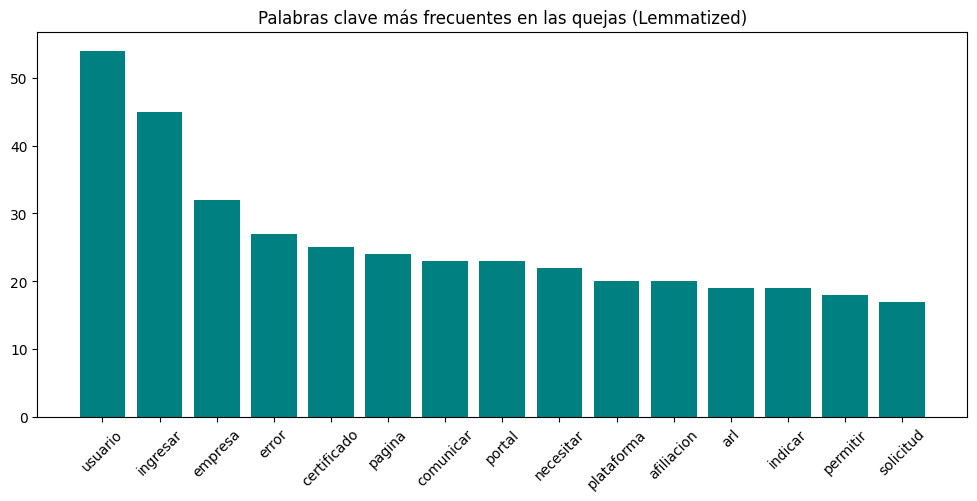

In [12]:
# Extraer todos los lemas de todas las quejas
todos_los_lemas = []
for descripcion in df['descripcion_anonimizada'].dropna().head(100): # Analizamos las primeras 100
    d = nlp(str(descripcion).lower())
    for token in d:
        if token.is_alpha and not token.is_stop: # Solo palabras reales y no conectores (stop words)
            todos_los_lemas.append(token.lemma_)

# Graficar las 15 más comunes
frecuencia = Counter(todos_los_lemas)
palabras, conteos = zip(*frecuencia.most_common(15))

plt.figure(figsize=(12,5))
plt.bar(palabras, conteos, color='teal')
plt.title("Palabras clave más frecuentes en las quejas (Lemmatized)")
plt.xticks(rotation=45)
plt.show()